In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv("spam.csv",encoding = 'ISO-8859-1')
df

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [56]:
df.drop(df.iloc[:,2:],axis=1,inplace=True)

In [57]:
df.isnull().sum()

class      0
message    0
dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [59]:
df.head(5)

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
df.duplicated().sum()

403

In [62]:
df=df.drop_duplicates(keep='first')

In [63]:
df['class'].value_counts()

0    4516
1     653
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

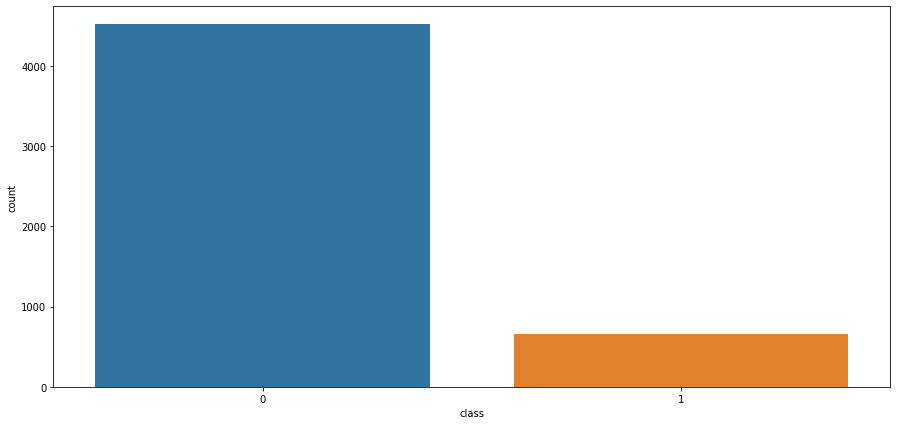

In [64]:
sns.countplot(df['class'])

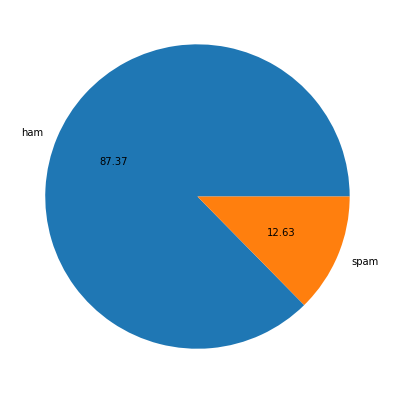

In [65]:
plt.pie(df['class'].value_counts(),labels=['ham','spam'],autopct="%0.2f");
plt.rcParams['figure.figsize']=(15,7)

In [66]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
#for finding all charcter in one sentences
df['Allcharacters']=df['message'].apply(len)
df['Allcharacters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Allcharacters, Length: 5169, dtype: int64

In [68]:
# for finding number of words
df['Words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

# for finding number of words
df['sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [69]:
df.iloc[:,2:].describe()

,Allcharacters,Words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [70]:
# for ham messages
df[df['class']==0][['Allcharacters','Words','sentences']].describe()

,Allcharacters,Words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [71]:
# for spam messages
df[df['class']==1][['Allcharacters','Words','sentences']].describe()

,Allcharacters,Words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


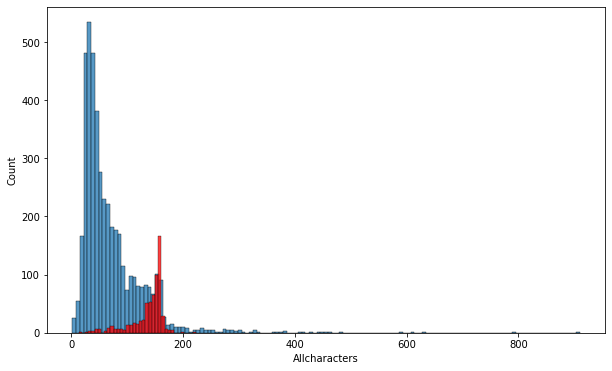

In [72]:
# lets find out the differences between ham and spam characters
plt.figure(figsize=(10,6))
sns.histplot(df[df['class']==0]['Allcharacters']);
sns.histplot(df[df['class']==1]['Allcharacters'],color='red');

# we can clearly see that ham messages are contruct with a huge amount character

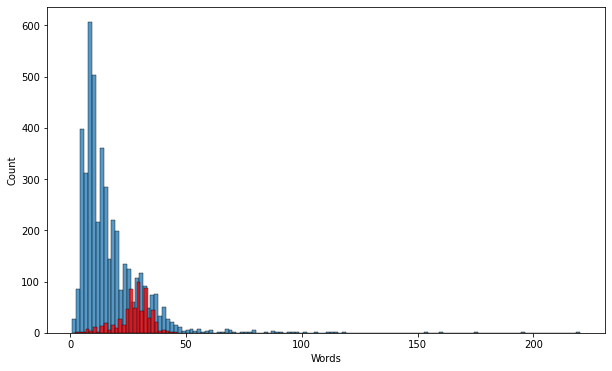

In [73]:
# lets find out the differences between ham and spam characters
plt.figure(figsize=(10,6))
sns.histplot(df[df['class']==0]['Words']);
sns.histplot(df[df['class']==1]['Words'],color='red');

# we can clearly see that ham messages are contruct with a huge amount character

In [74]:
df['message']=df['message'].str.lower()
df["message"]

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5169, dtype: object

In [75]:
#Removing html tags from strings
import re
def remove_html(text):
    search_text=re.compile("<.*?>")
    clean_text=re.sub(search_text,"",text)
    return clean_text
df['message']=df['message'].apply(remove_html)


In [76]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df['message']=df['message'].apply(remove_urls)


In [77]:
# Now its turn to remove punctuation from strings
import string
punc=string.punctuation
def remove_punc(text):
     return text.translate(str.maketrans('','',punc))
df['message']=df['message'].apply(remove_punc)


In [78]:
def remove_stopwords(text):
    old_list=[]
    for word in text.split():
        if word in stopwords.words("english"):
            old_list.append("")
        else:
            old_list.append(word)
    new_list=old_list[:]
    new_list.clear()
    return "  ".join(new_list)
#stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
#df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))


In [79]:

df['message']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5169, dtype: object

In [80]:
import re
def remove_number(number):
    newstring = re.sub(r'[0-9]+', '', number)
    return newstring
df['message']=df['message'].apply(remove_number)

In [81]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['message']=df['message'].apply(remove_html)


In [82]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

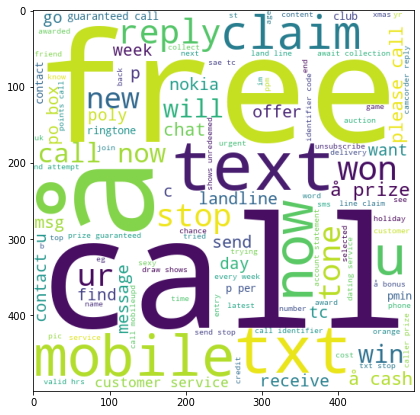

In [83]:
spam_wc=wc.generate(df[df['class']==1]['message'].str.cat(sep=''))
plt.imshow(spam_wc)

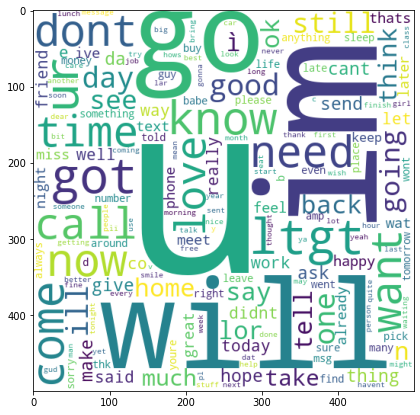

In [84]:
ham_wc=wc.generate(df[df['class']==0]['message'].str.cat(sep=''))
plt.imshow(ham_wc)

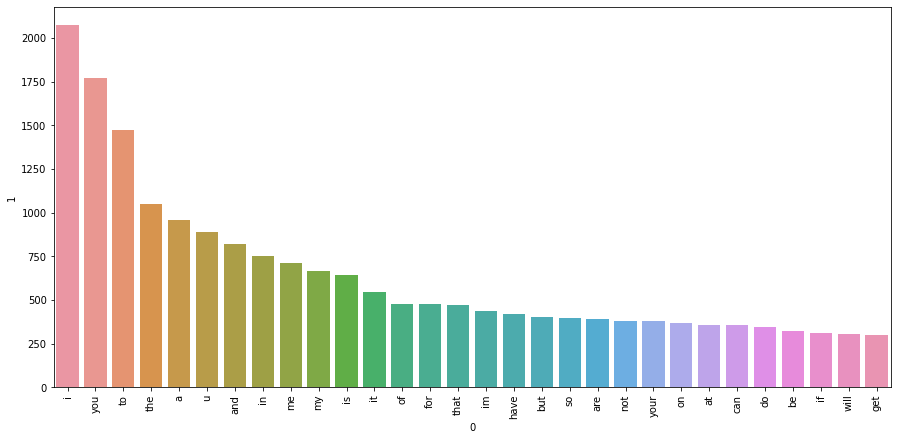

In [85]:
from collections import Counter
top_ham=[]
for msg in df[df['class']==0]['message'].tolist():
    for word in msg.split():
        top_ham.append(word)

len(top_ham)        

#There are 13856 word in the spam words 
#a=Counter(top_spam).most_common(50)
sns.barplot(pd.DataFrame(Counter(top_ham).most_common(30))[0],pd.DataFrame(Counter(top_ham).most_common(30))[1])
plt.xticks(rotation='vertical');


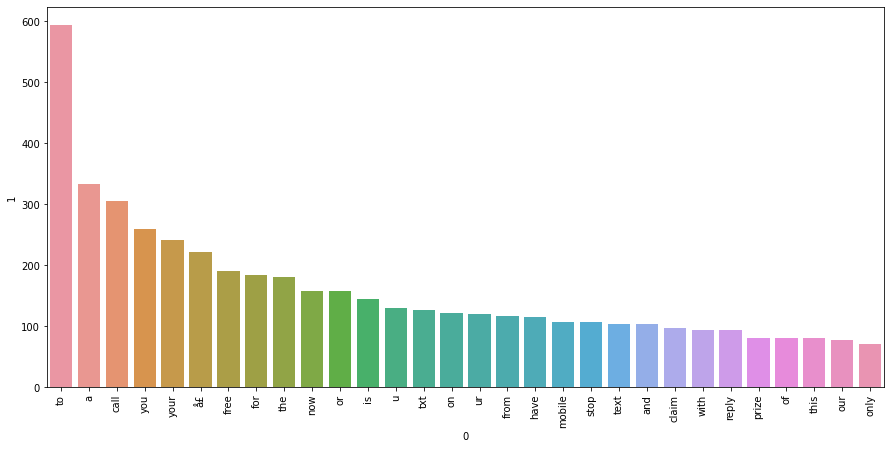

In [86]:
from collections import Counter
top_spam=[]
for msg in df[df['class']==1]['message'].tolist():
    for word in msg.split():
        top_spam.append(word)

len(top_spam)        

#There are 13856 word in the spam words 
#a=Counter(top_spam).most_common(50)
sns.barplot(pd.DataFrame(Counter(top_spam).most_common(30))[0],pd.DataFrame(Counter(top_spam).most_common(30))[1])
plt.xticks(rotation='vertical');


In [87]:
df['message']=df['message'].str.lower()
df["message"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in  a wkly comp to win fa cup final...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried  contact u u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5169, dtype: object

In [88]:

y=df['class']

In [89]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(ngram_range=(1, 1))
# X=cv.fit_transform(df['message']).toarray()
# X.shape

In [90]:
# from sklearn.ensemble import RandomForestClassifier
# rfc1=RandomForestClassifier(n_estimators=100,criterion='gini')
# rfc1.fit(X_train,y_train)
# y_pred=rfc1.predict(X_test)
# y_pred

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.02, random_state=2)

In [93]:
# print("Confusion matrix is", confusion_matrix(y_test,y_pred))
# print("\n")
# print("Accuracy_score is", accuracy_score(y_test,y_pred))
# print("precison score",precision_score(y_test,y_pred))

In [94]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
# gb=GaussianNB()
# gb.fit(X_train,y_train)
# y_pred=gb.predict(X_test)
# print(classification_report(y_test,y_pred))
# print()
# print("Confusion matrix is", confusion_matrix(y_test,y_pred))
# print("\n")
# print("Accuracy_score is", accuracy_score(y_test,y_pred))
# print("precision score is", precision_score(y_test,y_pred))

In [95]:
# mb=MultinomialNB()
# mb.fit(X_train,y_train)
# y_pred=mb.predict(X_test)
# print(classification_report(y_test,y_pred))
# print()
# print("Confusion matrix is", confusion_matrix(y_test,y_pred))
# print("\n")
# print("Accuracy_score is", accuracy_score(y_test,y_pred))
# print("precision score is", precision_score(y_test,y_pred))

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['message']).toarray()
X.shape

(5169, 8501)

In [97]:
y=df['class'].values

In [98]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
rfc2=RandomForestClassifier(n_estimators=100,criterion='gini')
rfc2.fit(X_train,y_train)
y_pred=rfc2.predict(X_test)
print("Confusion matrix is", confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy_score is", accuracy_score(y_test,y_pred))
print("precison score",precision_score(y_test,y_pred))

Confusion matrix is [[85  0]
 [ 5 14]]


Accuracy_score is 0.9519230769230769
precison score 1.0


In [100]:
# gb=GaussianNB()
# gb.fit(X_train,y_train)
# y_pred=gb.predict(X_test)
# print(classification_report(y_test,y_pred))
# print()
# print("Confusion matrix is", confusion_matrix(y_test,y_pred))
# print("\n")
# print("Accuracy_score is", accuracy_score(y_test,y_pred))
# print("precision score is", precision_score(y_test,y_pred))

In [101]:
# mb=MultinomialNB()
# mb.fit(X_train,y_train)
# y_pred=mb.predict(X_test)
# print(classification_report(y_test,y_pred))
# print()
# print("Confusion matrix is", confusion_matrix(y_test,y_pred))
# print("\n")
# print("Accuracy_score is", accuracy_score(y_test,y_pred))
# print("precision score is", precision_score(y_test,y_pred))

In [102]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc2,open('model.pkl','wb'))